### Loading packages

In [34]:
#### Loading packages ####
# We use tidyverse in this note
library(tidyverse)

# library(lme4)
# In Base R, 
# We have lm(): fitting linear models 
#         aov(): fitting anova 

### Data importation

In [ ]:
# <-: assigning values to an object  
# A<-10: assigning 10 to an object A

In [36]:
Y<- c(6.98, 5.15, 2.78, 4.94, 7.18, 5.70, 4.70, 5.69, 11.23, 7.90,
     6.00, 6.97, 6.32, 7.02, 6.84, 8.53)

In [37]:
Y

[1]  6.98  5.15  2.78  4.94  7.18  5.70  4.70  5.69 11.23  7.90  6.00  6.97
[13]  6.32  7.02  6.84  8.53

In [38]:
# 1. Manually enter: 
Y<- c(6.98, 5.15, 2.78, 4.94, 7.18, 5.70, 4.70, 5.69, 11.23, 7.90,
     6.00, 6.97, 6.32, 7.02, 6.84, 8.53)
X<-c(0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1)
hw3dat<-tibble(X=X,Y=Y) # data.frame(X=X,Y=Y)

dim(hw3dat)
summary(hw3dat)
# 1st Qu.: First quartile, 25% quantile 
# median: second quartile, 50% quantile
# 3rd Qu.: third quartile, 75% quantile  

[1] 16  2

       X             Y         
 Min.   :0.0   Min.   : 2.780  
 1st Qu.:0.0   1st Qu.: 5.555  
 Median :0.5   Median : 6.580  
 Mean   :0.5   Mean   : 6.496  
 3rd Qu.:1.0   3rd Qu.: 7.060  
 Max.   :1.0   Max.   :11.230  

In [39]:
typeof(hw3dat$X)

[1] "double"

In [43]:
# Let R know that X is a factor 
hw3dat$X <- as.factor(hw3dat$X)
typeof(hw3dat$X)
summary(hw3dat)

[1] "integer"

 X           Y         
 0:8   Min.   : 2.780  
 1:8   1st Qu.: 5.555  
       Median : 6.580  
       Mean   : 6.496  
       3rd Qu.: 7.060  
       Max.   :11.230  

In [49]:
# 2. Read a CSV file (comma-separated value)
wage = read_csv("./wage.csv")
# "=" is identical to "<-"
# "=" is not the same as "=="


Rows: 534 Columns: 3
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ethnicity, occupation
dbl (1): wage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [50]:
summary(wage)

      wage         ethnicity          occupation       
 Min.   : 1.000   Length:534         Length:534        
 1st Qu.: 5.250   Class :character   Class :character  
 Median : 7.780   Mode  :character   Mode  :character  
 Mean   : 9.024                                        
 3rd Qu.:11.250                                        
 Max.   :44.500                                        

In [52]:
# Let R know that both ethnicity and occupation should be treated as factor
wage$ethnicity<-as.factor(wage$ethnicity)
wage$occupation<-as.factor(wage$occupation)

[1] "character"

In [53]:
summary(wage)

      wage           ethnicity        occupation 
 Min.   : 1.000   cauc    :440   management: 55  
 1st Qu.: 5.250   hispanic: 27   office    : 97  
 Median : 7.780   other   : 67   sales     : 38  
 Mean   : 9.024                  services  : 83  
 3rd Qu.:11.250                  technical :105  
 Max.   :44.500                  worker    :156  

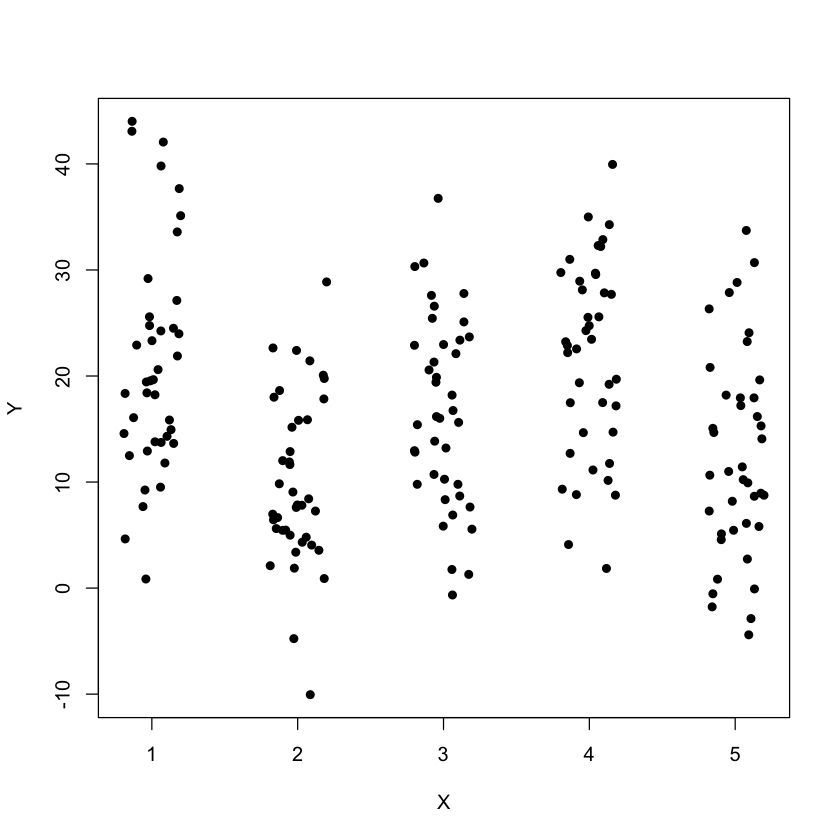

In [73]:
# 3. Generate synthetic data

set.seed(1)
sigma=10
n=200; # 200 balls 
a=5; # 5 factor levels (colors)
mus=2*((c(4,1,3,5,2)+1));
X<-rep(1:a,times=40)
Y=(2*mus[X])+rnorm(n,sd=sigma); # response Y
#X=as.factor(X);
dat.sim<-tibble(Y=Y,X=X)

plot(dat.sim$Y~jitter(dat.sim$X),xlab="X",ylab="Y",pch=16)

### Model fitting 

In [75]:
#### Model fitting ####

mod<-aov(Y~X,data=hw3dat) 

# Translate this line to English:
# (aov): fit an ANOVA model  with   
# (Y~X): Y being the response and X being the factor, 
# (data=hw3dat): where X and Y are columns from the dataset hw3dat,
# (mod <-) and save the fitted model as object "mod"

mod

Call:
   aov(formula = Y ~ X, data = hw3dat)

Terms:
                       X Residuals
Sum of Squares  19.55851  33.10769
Deg. of Freedom        1        14

Residual standard error: 1.537802
Estimated effects may be unbalanced

In [76]:
summary(mod)

            Df Sum Sq Mean Sq F value Pr(>F)  
X            1  19.56  19.559   8.271 0.0122 *
Residuals   14  33.11   2.365                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [77]:
# Two-way ANOVA: 

mod2way <- aov(wage ~ ethnicity+occupation, data=wage)

summary(mod2way)

             Df Sum Sq Mean Sq F value Pr(>F)    
ethnicity     2    173    86.3   3.967 0.0195 *  
occupation    5   2459   491.7  22.598 <2e-16 ***
Residuals   526  11445    21.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Statistical inference

In [79]:
# Full model v.s. reduced model:
# Suppose we want to test if occupation is associated with wage

# full model is mod2way

# reduced model is the model without occupation
modred=aov(wage~ethnicity,data=wage)
summary(modred)

             Df Sum Sq Mean Sq F value Pr(>F)  
ethnicity     2    173   86.33   3.297 0.0378 *
Residuals   531  13904   26.18                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [82]:
# The F-test is 
anova(mod2way,modred)
# anova() v.s. aov()! 

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,526,11445.48,NA,NA,NA,NA
2,531,13904.04,-5,-2458.569,22.5977,1.467948e-20


In [87]:
summary(mod2way)

             Df Sum Sq Mean Sq F value Pr(>F)    
ethnicity     2    173    86.3   3.967 0.0195 *  
occupation    5   2459   491.7  22.598 <2e-16 ***
Residuals   526  11445    21.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [85]:
# Confidence interval via confint()
confint(mod,level=0.98)
confint(mod2way,level=0.95)

,1 %,99 %
(Intercept),3.963075,6.816925
X1,0.193274,4.229226


,2.5 %,97.5 %
(Intercept),11.614970,14.11028601
ethnicityhispanic,-3.623519,0.01717132
ethnicityother,-1.766047,0.66103778
occupationoffice,-6.809419,-3.71391112
occupationsales,-7.113086,-3.24476555
occupationservices,-7.679700,-4.48358999
occupationtechnical,-2.318766,0.73376462
occupationworker,-5.725167,-2.85073272


### Simultaneius confidence intervals

We will revisit this section on Wednesday.

### Model diagnostics 

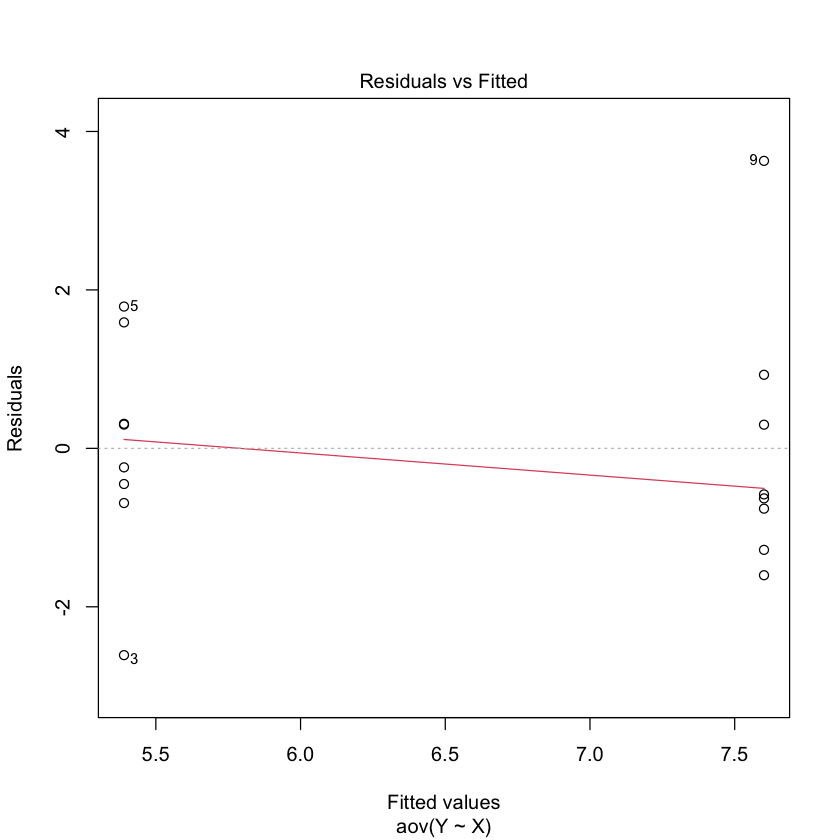

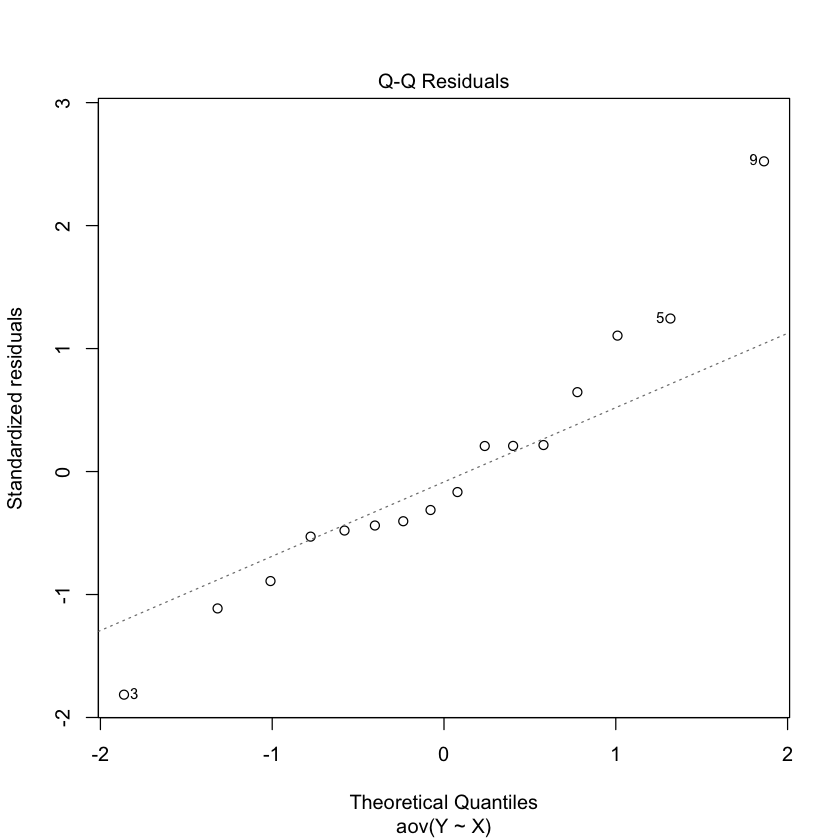

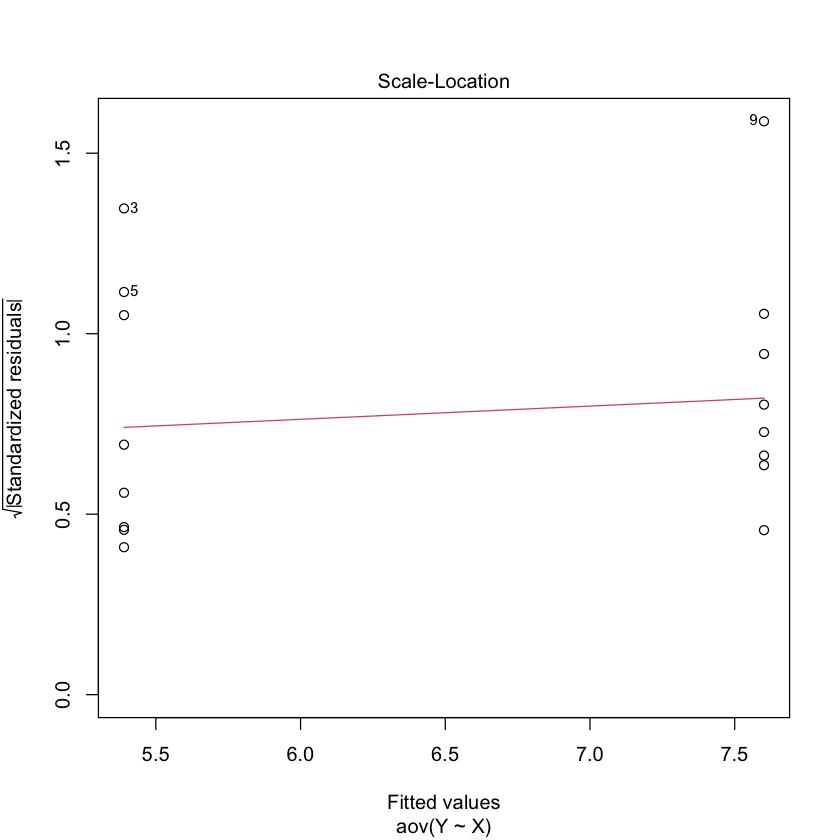

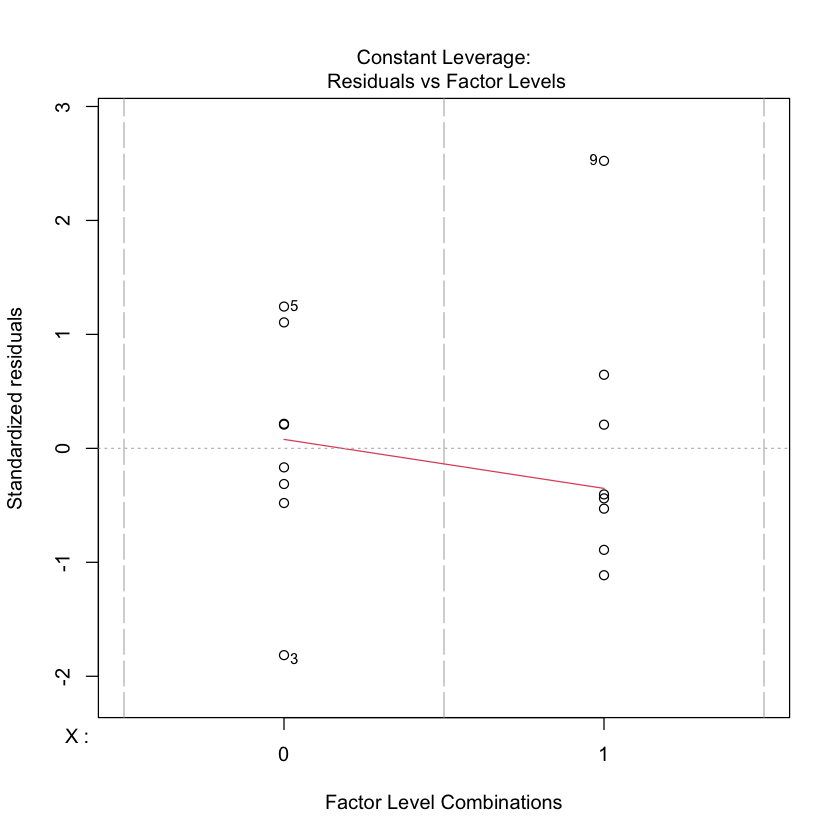

In [86]:
plot(mod)

In [ ]:
plot(mod2way)

### Simulation 

We can conduct a simulation to investigate the meaning of coverage probabilities of confidence intervals

In [88]:
# One instance:
alpha=0.05
sigma=10
n=200; # 200 samples in total
a=5; # 5 factor levels (colors)
mus=2*((c(4,1,3,5,2)+1));
X<-rep(1:a,times=40)
Y=(2*mus[X])+rnorm(n,sd=sigma); # response Y
dat.sim<-tibble(Y=Y,X=as.factor(X))

fit.anova=aov(Y~X,data=dat.sim);
CIs<-confint(fit.anova,level=1-alpha)  

In [ ]:
# define a function by 

# function.name <- function( arguments of the function){
    # code in the function to be run
# }

In [90]:
# Wrapping up the function
simulate.instance<- function( alpha){
  
  sigma=10
  n=200; # 200 samples in total
  a=5; # 5 factor levels (colors)
  mus=2*((c(4,1,3,5,2)+1));
  X<-rep(1:a,times=40)
  Y=(2*mus[X])+rnorm(n,sd=sigma); # response Y
  dat.sim<-tibble(Y=Y,X=as.factor(X))
  
  fit.anova=aov(Y~X,data=dat.sim);
  CIs<-confint(fit.anova,level=1-alpha)
    
  return(CIs)
}

In [107]:
#set.seed(1)
simulate.instance(alpha=0.01)

,0.5 %,99.5 %
(Intercept),18.700639,26.9441072
X2,-21.205840,-9.5478160
X3,-12.363001,-0.7049761
X4,-7.254819,4.4032050
X5,-14.572369,-2.9143447


In [114]:
# Run simulation
set.seed(1)

N.sim=200
sim.CIs=replicate(N.sim,simulate.instance(alpha=0.05));

In [110]:
dim(sim.CIs)

[1]   5   2 100

In [115]:
# True difference between mu2 and mu1 is
diff.true= 5-17

# Coverage probability: 
coverage=sum(sim.CIs[2,1,]<diff.true & sim.CIs[2,2,]>diff.true) / N.sim;
coverage

[1] 0.96

In [116]:
sum(sim.CIs[2,1,]<diff.true & sim.CIs[2,2,]>diff.true) 

[1] 192

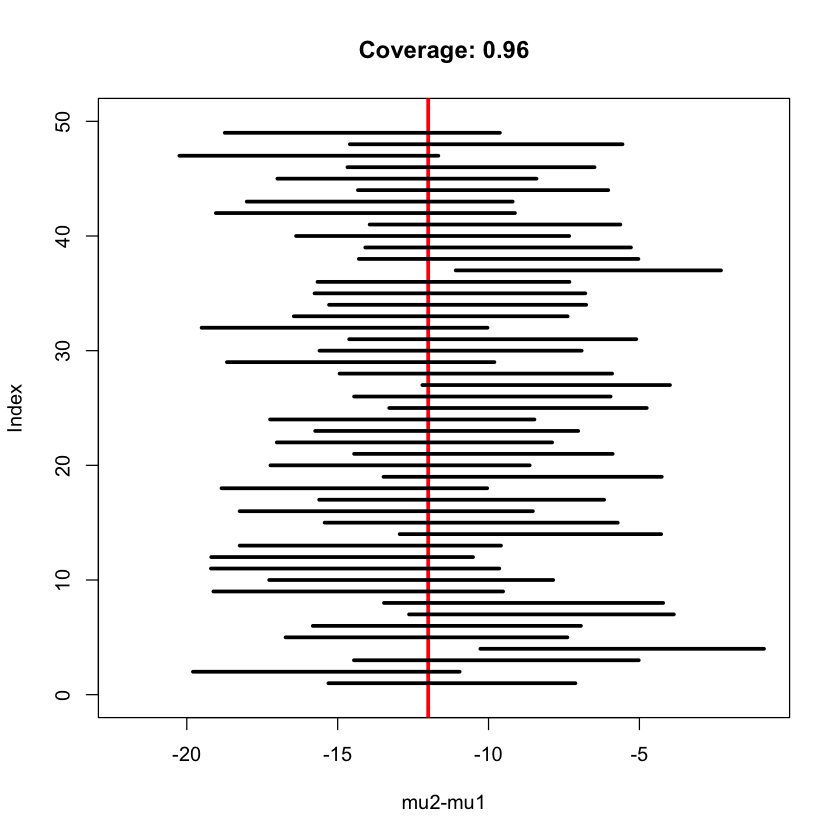

In [117]:

# Visualize result

plot(0,0,col="white",xlim=c(min(sim.CIs[2,1,]),max(sim.CIs[2,2,])),
     ylim=c(0,50),xlab="mu2-mu1",ylab="Index",main=paste('Coverage:', signif(coverage,3)))
abline(v=diff.true,lwd=3,col='red')
for(i in 1:49){
  segments(sim.CIs[2,1,i],i,sim.CIs[2,2,i],i,lwd=3)
}



